In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
import seaborn as sns, numpy as np
import json
import geopandas as gpd
import statsmodels.api as sm

/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Import

In [2]:
visits_data = pd.read_csv('data/2019_vists_data_monthly.csv')

In [3]:
visits_data

,fk_sgplaces,local_month,total_visits,raw_visits,naics_code,activity_level
0,zzw-22f@5pw-5zc-9pv,2019-10-01,27946,1506,812930,1
1,zzw-222@5pw-5zw-mrk,2019-10-01,62758,1470,812930,1
2,223-225@5pw-624-nh5,2019-10-01,26277,603,812930,1
3,222-228@5pw-623-t35,2019-10-01,19759,1061,812930,1
4,226-222@5pw-5zw-jd9,2019-10-01,22407,1705,812930,1
...,...,...,...,...,...,...
16495,228-222@5pw-6ct-8sq,2019-11-01,83586,5,445110,17
16496,223-22r@5pw-692-mzf,2019-11-01,4683,6,445110,17
16497,222-224@5pw-67j-gp9,2019-11-01,50154,6,445110,17
16498,22k-222@5pw-6qh-psq,2019-11-01,46582,7,445110,17


In [4]:
home_data = pd.read_csv('data/2019_homes_data_monthly.csv')

In [5]:
home_data

,fk_sgplaces,fk_zipcodes,visit_percentage,local_month
0,222-222@5pw-2r3-nwk,60643,30.66,2019-11-01
1,222-222@5pw-2r3-nwk,60613,6.43,2019-11-01
2,222-222@5pw-2r3-nwk,60426,6.80,2019-11-01
3,222-222@5pw-2r3-nwk,60827,5.83,2019-11-01
4,222-222@5pw-2r3-nwk,60628,43.12,2019-11-01
...,...,...,...,...
44858,zzy-224@5pw-624-bx5,60651,1.77,2019-02-01
44859,zzy-224@5pw-624-bx5,60610,2.39,2019-02-01
44860,zzy-224@5pw-624-bx5,60618,3.25,2019-02-01
44861,zzy-224@5pw-624-bx5,60611,2.43,2019-02-01


In [6]:
zip_code = gpd.read_file('other/Boundaries - ZIP Codes.geojson')

In [7]:
zip_code

,objectid,shape_area,shape_len,zip,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."
...,...,...,...,...,...
56,57,155285532.005,53406.9156168,60623,"MULTIPOLYGON (((-87.69479 41.83008, -87.69486 ..."
57,58,211114779.439,58701.3253749,60629,"MULTIPOLYGON (((-87.68306 41.75786, -87.68306 ..."
58,59,211696050.967,58466.1602979,60620,"MULTIPOLYGON (((-87.62373 41.72167, -87.62388 ..."
59,60,125424284.172,52377.8545408,60637,"MULTIPOLYGON (((-87.57691 41.79511, -87.57700 ..."


In [8]:
#CHange type of zip_code to ensure the success of merge
zip_code['zip']=zip_code['zip'].astype(int)

In [9]:
#get centroids
zip_code["centroid"]=zip_code.geometry.centroid

/var/folders/np/8s6_n_b16lx7rwgjy309j74m0000gn/T/ipykernel_28313/33580243.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zip_code["centroid"]=zip_code.geometry.centroid


In [10]:
zip_code.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    61 non-null     object  
 1   shape_area  61 non-null     object  
 2   shape_len   61 non-null     object  
 3   zip         61 non-null     int64   
 4   geometry    61 non-null     geometry
 5   centroid    61 non-null     geometry
dtypes: geometry(2), int64(1), object(3)
memory usage: 3.0+ KB


In [11]:
home_data_1= pd.merge(home_data, zip_code, left_on="fk_zipcodes", right_on="zip", how='left')
home_data_1=home_data_1.dropna()

In [12]:
home_data_1

,fk_sgplaces,fk_zipcodes,visit_percentage,local_month,objectid,shape_area,shape_len,zip,geometry,centroid
0,222-222@5pw-2r3-nwk,60643,30.66,2019-11-01,13,183013076.262,59337.8074397,60643.0,"MULTIPOLYGON (((-87.64191 41.67781, -87.64185 ...",POINT (-87.66119 41.69740)
1,222-222@5pw-2r3-nwk,60643,30.66,2019-11-01,15,3136688.22496,7175.09216765,60643.0,"MULTIPOLYGON (((-87.64125 41.65810, -87.64143 ...",POINT (-87.64422 41.66048)
2,222-222@5pw-2r3-nwk,60613,6.43,2019-11-01,53,53990894.8848,31196.3206564,60613.0,"MULTIPOLYGON (((-87.63894 41.95009, -87.64283 ...",POINT (-87.66006 41.95444)
4,222-222@5pw-2r3-nwk,60827,5.83,2019-11-01,44,48551330.3923,28833.9637574,60827.0,"MULTIPOLYGON (((-87.58479 41.64470, -87.58567 ...",POINT (-87.60154 41.65200)
5,222-222@5pw-2r3-nwk,60628,43.12,2019-11-01,43,345241692.171,83748.9919899,60628.0,"MULTIPOLYGON (((-87.58515 41.72160, -87.58518 ...",POINT (-87.61437 41.69169)
...,...,...,...,...,...,...,...,...,...,...
45496,zzy-224@5pw-624-bx5,60651,1.77,2019-02-01,37,99039621.2518,47970.1401531,60651.0,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ...",POINT (-87.74108 41.90241)
45497,zzy-224@5pw-624-bx5,60610,2.39,2019-02-01,54,31598157.0867,24208.6988788,60610.0,"MULTIPOLYGON (((-87.62820 41.89668, -87.62820 ...",POINT (-87.63702 41.90414)
45498,zzy-224@5pw-624-bx5,60618,3.25,2019-02-01,24,141235867.545,47847.080382,60618.0,"MULTIPOLYGON (((-87.67855 41.94686, -87.67855 ...",POINT (-87.70298 41.94663)
45499,zzy-224@5pw-624-bx5,60611,2.43,2019-02-01,38,23506055.7304,34689.3506306,60611.0,"MULTIPOLYGON (((-87.61401 41.89354, -87.61369 ...",POINT (-87.61828 41.89436)


In [13]:
complete_data_1= pd.merge(home_data_1,visits_data , on=["fk_sgplaces","local_month"], how='left')

In [14]:
complete_data_1

,fk_sgplaces,fk_zipcodes,visit_percentage,local_month,objectid,shape_area,shape_len,zip,geometry,centroid,total_visits,raw_visits,naics_code,activity_level
0,222-222@5pw-2r3-nwk,60643,30.66,2019-11-01,13,183013076.262,59337.8074397,60643.0,"MULTIPOLYGON (((-87.64191 41.67781, -87.64185 ...",POINT (-87.66119 41.69740),61003,12,445110,14
1,222-222@5pw-2r3-nwk,60643,30.66,2019-11-01,15,3136688.22496,7175.09216765,60643.0,"MULTIPOLYGON (((-87.64125 41.65810, -87.64143 ...",POINT (-87.64422 41.66048),61003,12,445110,14
2,222-222@5pw-2r3-nwk,60613,6.43,2019-11-01,53,53990894.8848,31196.3206564,60613.0,"MULTIPOLYGON (((-87.63894 41.95009, -87.64283 ...",POINT (-87.66006 41.95444),61003,12,445110,14
3,222-222@5pw-2r3-nwk,60827,5.83,2019-11-01,44,48551330.3923,28833.9637574,60827.0,"MULTIPOLYGON (((-87.58479 41.64470, -87.58567 ...",POINT (-87.60154 41.65200),61003,12,445110,14
4,222-222@5pw-2r3-nwk,60628,43.12,2019-11-01,43,345241692.171,83748.9919899,60628.0,"MULTIPOLYGON (((-87.58515 41.72160, -87.58518 ...",POINT (-87.61437 41.69169),61003,12,445110,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35725,zzy-224@5pw-624-bx5,60651,1.77,2019-02-01,37,99039621.2518,47970.1401531,60651.0,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ...",POINT (-87.74108 41.90241),10090,253,812930,3
35726,zzy-224@5pw-624-bx5,60610,2.39,2019-02-01,54,31598157.0867,24208.6988788,60610.0,"MULTIPOLYGON (((-87.62820 41.89668, -87.62820 ...",POINT (-87.63702 41.90414),10090,253,812930,3
35727,zzy-224@5pw-624-bx5,60618,3.25,2019-02-01,24,141235867.545,47847.080382,60618.0,"MULTIPOLYGON (((-87.67855 41.94686, -87.67855 ...",POINT (-87.70298 41.94663),10090,253,812930,3
35728,zzy-224@5pw-624-bx5,60611,2.43,2019-02-01,38,23506055.7304,34689.3506306,60611.0,"MULTIPOLYGON (((-87.61401 41.89354, -87.61369 ...",POINT (-87.61828 41.89436),10090,253,812930,3


In [15]:
complete_data_1['visit_each']=complete_data_1['total_visits']*complete_data_1['visit_percentage']*0.01

In [16]:
poi=pd.read_csv('data/poi_data_all.csv')

In [17]:
complete_data_2= pd.merge(complete_data_1,poi , on="fk_sgplaces", how='left')

In [18]:
complete_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35730 entries, 0 to 35729
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   fk_sgplaces         35730 non-null  object  
 1   fk_zipcodes         35730 non-null  int64   
 2   visit_percentage    35730 non-null  float64 
 3   local_month         35730 non-null  object  
 4   objectid            35730 non-null  object  
 5   shape_area          35730 non-null  object  
 6   shape_len           35730 non-null  object  
 7   zip                 35730 non-null  float64 
 8   geometry            35730 non-null  geometry
 9   centroid            35730 non-null  geometry
 10  total_visits        35730 non-null  int64   
 11  raw_visits          35730 non-null  int64   
 12  naics_code_x        35730 non-null  int64   
 13  activity_level      35730 non-null  int64   
 14  visit_each          35730 non-null  float64 
 15  fk_sgbrands         35730 non-null  

# Calculating a distance Matrix

In [19]:
home_data_geography=home_data_1[['zip', 'centroid']]
store_data_gepgraphy=complete_data_2[['fk_sgplaces','latitude','longitude']]

In [20]:
complete_data_3=complete_data_2[['fk_sgplaces', 'zip','local_month', 'geometry','centroid','total_visits', 'visit_each','latitude','longitude','polygon_area_sq_ft']]

In [21]:
complete_data_3[0:50]
complete_data_3.to_csv('data/dataforcompetition.csv')

KeyboardInterrupt: 

In [22]:
#complete_data_test=complete_data_3[complete_data_3['fk_sgplaces'].isin(['222-222@5pw-2r3-nwk','222-222@5pw-5zh-skf','222-222@5pw-5zp-9cq','222-222@5pw-5zp-mrk'])]
complete_data_test=complete_data_3
complete_data_test=complete_data_test[['fk_sgplaces', 'zip', 'visit_each']]
complete_data_test

,fk_sgplaces,zip,visit_each
0,222-222@5pw-2r3-nwk,60643.0,18703.5198
1,222-222@5pw-2r3-nwk,60643.0,18703.5198
2,222-222@5pw-2r3-nwk,60613.0,3922.4929
3,222-222@5pw-2r3-nwk,60827.0,3556.4749
4,222-222@5pw-2r3-nwk,60628.0,26304.4936
...,...,...,...
35725,zzy-224@5pw-624-bx5,60651.0,178.5930
35726,zzy-224@5pw-624-bx5,60610.0,241.1510
35727,zzy-224@5pw-624-bx5,60618.0,327.9250
35728,zzy-224@5pw-624-bx5,60611.0,245.1870


In [23]:
home_data_geography=home_data_geography.drop_duplicates()
store_data_gepgraphy=store_data_gepgraphy.drop_duplicates()

In [24]:
complete_data_test1=complete_data_test.groupby(by=['fk_sgplaces','zip']).agg('sum')
complete_data_test1 = complete_data_test1.reset_index()
complete_data_test1=pd.merge(complete_data_test1,home_data_geography, on=['zip'],how='inner')
complete_data_test1=pd.merge(complete_data_test1,store_data_gepgraphy, on=['fk_sgplaces'],how='left')
complete_data_test1

,fk_sgplaces,zip,visit_each,centroid,latitude,longitude
0,222-222@5pw-2r3-nwk,60613.0,4586.2225,POINT (-87.66006 41.95444),41.683737,-87.643334
1,222-222@5pw-5zh-skf,60613.0,11076.4383,POINT (-87.66006 41.95444),41.914603,-87.654876
2,222-222@5pw-5zp-9cq,60613.0,182678.1321,POINT (-87.66006 41.95444),41.950004,-87.675114
3,222-222@5pw-5zp-mrk,60613.0,115506.5589,POINT (-87.66006 41.95444),41.958151,-87.653136
4,222-222@5pw-5zw-2ff,60613.0,13528.2801,POINT (-87.66006 41.95444),41.867790,-87.625497
...,...,...,...,...,...,...
7486,zzw-229@5pw-5zg-hnq,60638.0,2679.1102,POINT (-87.76937 41.78917),41.924494,-87.678157
7487,zzy-222@5pw-69r-5mk,60638.0,466.2964,POINT (-87.76937 41.78917),41.888581,-87.649328
7488,zzy-222@5pw-6rd-789,60638.0,720.8821,POINT (-87.76937 41.78917),41.997107,-87.787148
7489,zzy-223@5pw-699-k2k,60638.0,118.1026,POINT (-87.76937 41.78917),41.939345,-87.687158


In [25]:
zip_1=complete_data_test[['zip']]
zip_1=zip_1.drop_duplicates()

In [26]:
complete_data_test1["x"] = complete_data_test1["centroid"].map(lambda p: p.x)
complete_data_test1["y"] = complete_data_test1["centroid"].map(lambda p: p.y)

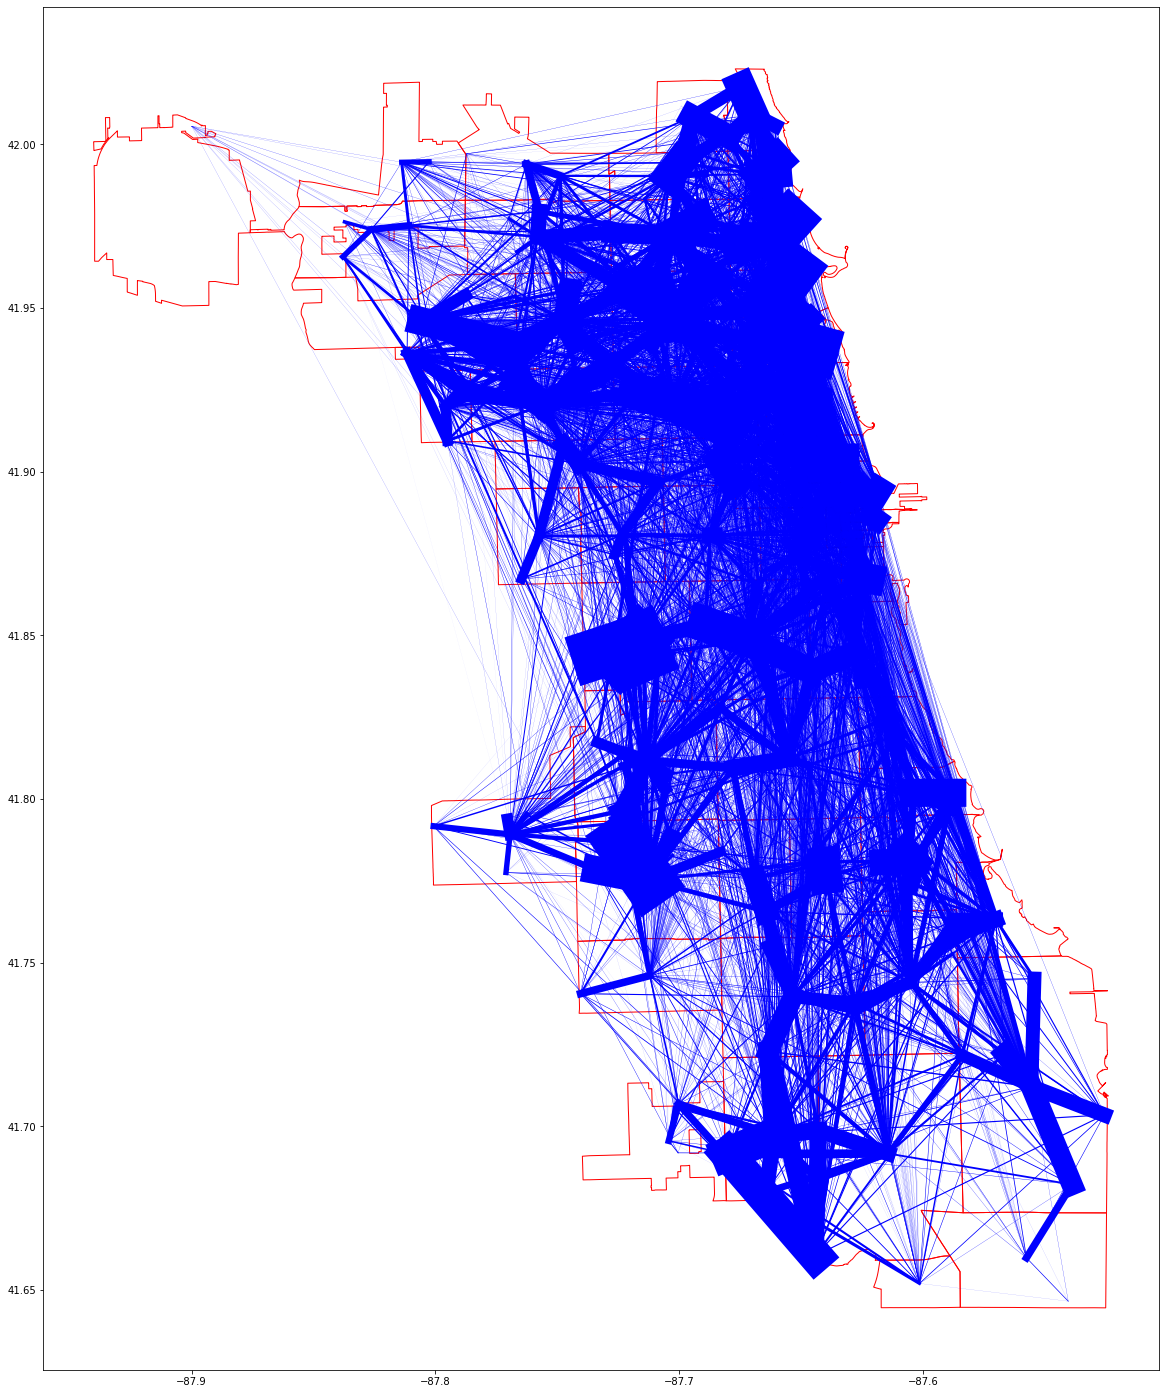

In [186]:
#plot the base map
zip_code.plot(figsize = (20,30), facecolor = "None", edgecolor = "r")

#iterate over each pair
for index, row in complete_data_test1.iterrows():
    #get the x coordinates
    x1 = [complete_data_test1.iloc[index]['longitude'],complete_data_test1.iloc[index]['x']]
    #get the y coordinates
    y1 = [complete_data_test1.iloc[index]['latitude'],complete_data_test1.iloc[index]['y']]
    #plot the line between the x and y coordinates with width reflecting the number of flows
    plt.plot(x1, y1, linewidth = complete_data_test1.iloc[index]['visit_each']*0.0001,color = "Blue")

In [27]:
complete_data_test1['visit_each']=round(complete_data_test1['visit_each'])
complete_data_test1.rename(columns = {'fk_sgplaces': 'store_id', 'zip':'home_zip','centroid':'home_centroid','latitude':'store_lat','longitude':'store_lng','x': 'home_lng', 'y': 'home_lat'},inplace=True)

In [28]:
complete_data_test1

,store_id,home_zip,visit_each,home_centroid,store_lat,store_lng,home_lng,home_lat
0,222-222@5pw-2r3-nwk,60613.0,4586.0,POINT (-87.66006 41.95444),41.683737,-87.643334,-87.660056,41.954445
1,222-222@5pw-5zh-skf,60613.0,11076.0,POINT (-87.66006 41.95444),41.914603,-87.654876,-87.660056,41.954445
2,222-222@5pw-5zp-9cq,60613.0,182678.0,POINT (-87.66006 41.95444),41.950004,-87.675114,-87.660056,41.954445
3,222-222@5pw-5zp-mrk,60613.0,115507.0,POINT (-87.66006 41.95444),41.958151,-87.653136,-87.660056,41.954445
4,222-222@5pw-5zw-2ff,60613.0,13528.0,POINT (-87.66006 41.95444),41.867790,-87.625497,-87.660056,41.954445
...,...,...,...,...,...,...,...,...
7486,zzw-229@5pw-5zg-hnq,60638.0,2679.0,POINT (-87.76937 41.78917),41.924494,-87.678157,-87.769366,41.789169
7487,zzy-222@5pw-69r-5mk,60638.0,466.0,POINT (-87.76937 41.78917),41.888581,-87.649328,-87.769366,41.789169
7488,zzy-222@5pw-6rd-789,60638.0,721.0,POINT (-87.76937 41.78917),41.997107,-87.787148,-87.769366,41.789169
7489,zzy-223@5pw-699-k2k,60638.0,118.0,POINT (-87.76937 41.78917),41.939345,-87.687158,-87.769366,41.789169


In [29]:
complete_data_test1.to_csv("visualize_flow.csv")

# Scrape Data from OpenStreetMap

In [31]:
import osmnx as ox

In [30]:
tags = {'amenity':'parking'}
parking = ox.geometries_from_place('Chicago, USA', tags)

/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [43]:
parking
to_drop=['relation','way']
parking = parking.drop(to_drop)

In [44]:
parking

amenity                    geometry level  \
element_type osmid                                                   
node         258490031   parking  POINT (-87.64385 41.95123)   NaN   
             418527731   parking  POINT (-87.65454 41.91480)   NaN   
             1557244580  parking  POINT (-87.65700 41.96323)   NaN   
             2356511943  parking  POINT (-87.62468 41.86944)   NaN   
             2923650586  parking  POINT (-87.63585 41.91133)   NaN   
             3399988517  parking  POINT (-87.61552 41.89122)   NaN   
             3399988519  parking  POINT (-87.61962 41.89273)   NaN   
             3548085087  parking  POINT (-87.61043 41.86064)   NaN   
             3570720493  parking  POINT (-87.70028 41.91421)   NaN   
             4035489531  parking  POINT (-87.63267 41.86900)   NaN   
             4168496832  parking  POINT (-87.79177 41.90936)   NaN   
             4271533994  parking  POINT (-87.66117 41.89597)   NaN   
             4271569389  parking  POINT (-87.65685 41.89647)   NaN   
             4499014625  parking  POINT (-87.66872 41.70678)   NaN   
             5000997577  parking  POINT (-87.62635 41.89143)   NaN   
             5035987058  parking  POINT (-87.62307 41.89828)   NaN   
             5039387135  parking  POINT (-87.64530 41.86581)   NaN   
             5156341994  parking  POINT (-87.65656 41.96224)   NaN   
             5382189221  parking  POINT (-87.62864 41.89180)   NaN   
             5382280221  parking  POINT (-87.62877 41.89230)   NaN   
             6968138863  parking  POINT (-87.64595 41.87006)   NaN   
             7121020628  parking  POINT (-87.74192 41.94653)   NaN   
             7152419151  parking  POINT (-87.65693 41.97310)   NaN   
             8447260701  parking  POINT (-87.75674 41.95302)   NaN   
             8447260702  parking  POINT (-87.75505 41.95301)   NaN   
             8447272763  parking  POINT (-87.75782 41.95286)   NaN   
             8447272764  parking  POINT (-87.75826 41.95297)   NaN   
             8447272765  parking  POINT (-87.75914 41.95298)   NaN   
             8447272766  parking  POINT (-87.76069 41.95300)   NaN   
             8447272767  parking  POINT (-87.76149 41.95295)   NaN   
             8487099812  parking  POINT (-87.76717 41.93789)   NaN   
             8614066022  parking  POINT (-87.63419 41.88602)   NaN   
             9203436323  parking  POINT (-87.62168 41.89817)   NaN   
             9568441369  parking  POINT (-87.57506 41.77898)   NaN   
             9661493190  parking  POINT (-87.66879 41.84568)   NaN   

                              parking entrance     access barrier  fee layer  \
element_type osmid                                                             
node         258490031            NaN      NaN        NaN     NaN  NaN   NaN   
             418527731        rooftop      NaN        NaN     NaN  NaN   NaN   
             1557244580   underground      NaN  customers     NaN   no    -1   
             2356511943   underground      NaN        NaN     NaN  NaN    -1   
             2923650586           NaN      yes        NaN     NaN  NaN   NaN   
             3399988517   underground      NaN        NaN     NaN  NaN    -1   
             3399988519  multi-storey      NaN        yes     NaN  yes   NaN   
             3548085087           NaN      NaN        NaN     NaN  NaN   NaN   
             3570720493           NaN      NaN        NaN     NaN  NaN   NaN   
             4035489531   underground      NaN  customers     NaN  NaN    -1   
             4168496832           NaN      NaN        NaN     NaN  NaN   NaN   
             4271533994           NaN      NaN        NaN     NaN  NaN   NaN   
             4271569389           NaN      NaN        NaN     NaN  NaN   NaN   
             4499014625           NaN      NaN        NaN     NaN  NaN   NaN   
             5000997577           NaN      NaN        yes     NaN  yes   NaN   
             5035987058           NaN      NaN        yes     NaN  yes   N

In [55]:
tags = {'public_transport':'station'}
bus = ox.geometries_from_place('Chicago, USA', tags)

/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [56]:
bus=bus.drop(to_drop)

/var/folders/np/8s6_n_b16lx7rwgjy309j74m0000gn/T/ipykernel_1390/357846068.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  bus=bus.drop(to_drop)


In [58]:
bus

amenity ferry                         name  \
element_type osmid                                                           
node         20217109    ferry_terminal   yes  Michigan Avenue Bridge Dock   
             252643581              NaN   NaN                        Morse   
             252643632              NaN   NaN                     Sheridan   
             252683058              NaN   NaN                      Addison   
             252683064              NaN   NaN                      Belmont   
...                                 ...   ...                          ...   
             8015063708  ferry_terminal   yes                          NaN   
             8018718986             NaN   NaN                95th/Dan Ryan   
             8022678885  ferry_terminal   yes                          NaN   
             8022678886  ferry_terminal   yes                          NaN   
             8419201645             NaN   NaN  O'Hare Multi-Modal Facility   

                                      network                   operator  \
element_type osmid                                                         
node         20217109    Shoreline Water Taxi       Shoreline Water Taxi   
             252643581                    CTA  Chicago Transit Authority   
             252643632                    CTA  Chicago Transit Authority   
             252683058                    CTA  Chicago Transit Authority   
             252683064                    CTA  Chicago Transit Authority   
...                                       ...                        ...   
             8015063708                   NaN                        NaN   
             8018718986                   CTA  Chicago Transit Authority   
             8022678885                   NaN                        NaN   
             8022678886                   NaN                        NaN   
             8419201645                   ATS                 O'Hare ATS   

                        public_transport source                    geometry  \
element_type osmid                                                            
node         20217109            station    PGS  POINT (-87.62252 41.88915)   
             252643581           station    NaN  POINT (-87.66597 42.00809)   
             252643632           station    NaN  POINT (-87.65493 41.95389)   
             252683058           station    NaN  POINT (-87.65363 41.94752)   
             252683064           station    NaN  POINT (-87.65333 41.93980)   
...                                  ...    ...                         ...   
             8015063708          station    NaN  POINT (-87.61613 41.88795)   
             8018718986          station    NaN  POINT (-87.62440 41.72171)   
             8022678885          station    NaN  POINT (-87.62243 41.88850)   
             8022678886          station    NaN  POINT (-87.62101 41.88837)   
             8419201645          station    NaN  POINT (-87.88235 41.99297)   

                        addr:city addr:housenumber  ... shop  bus phone  \
element_type osmid                                  ...                   
node         20217109         NaN              NaN  ...  NaN  NaN   NaN   
             252643581    Chicago             1358  ...  NaN  NaN   NaN   
             252643632    Chicago             3940  ...  NaN  NaN   NaN   
             252683058    Chicago              940  ...  NaN  NaN   NaN   
             252683064    Chicago              945  ...  NaN  NaN   NaN   
...                           ...              ...  ...  ...  ...   ...   
             8015063708       NaN              NaN  ...  NaN  NaN   NaN   
             8018718986   Chicago               15  ...  NaN  NaN   NaN   
             8022678885       NaN              NaN  ...  NaN  NaN   NaN   
             8022678886       NaN              NaN  ...  NaN  NaN   NaN   
             8419201645       NaN              NaN  ...  NaN  NaN   NaN   

                        

<AxesSubplot:>

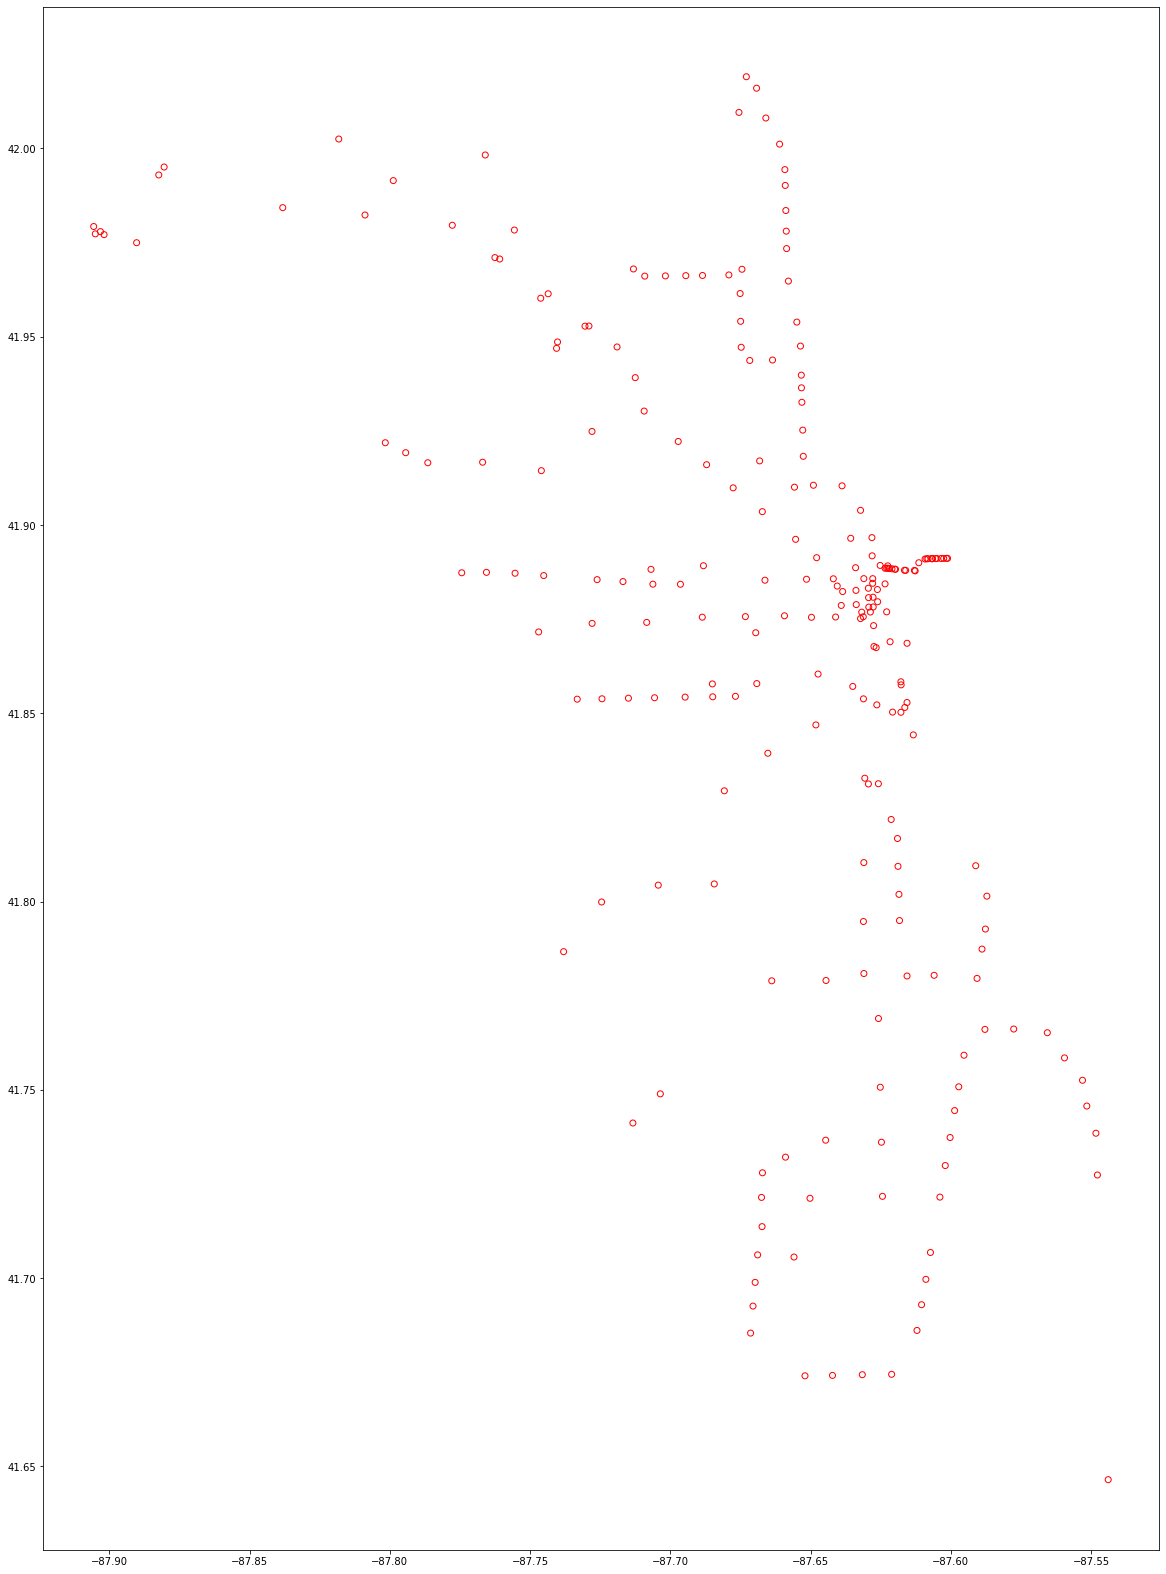

In [59]:
bus.plot(figsize = (20,30), facecolor = "None", edgecolor = "r")

In [60]:
bus.to_csv('bus.csv')

In [19]:
buffer_results=pd.read_csv('data/complete_data_withcom_csv.csv')

In [20]:
competetion=pd.read_csv('data/cdata_final.csv')

In [21]:
buffer_results_new=pd.merge(buffer_results,competetion, left_on='fk_sgplaces',right_on='fk_sgplaces_x', how='left')

In [22]:
buffer_results_new

,fk_sgplaces,fk_sgbrands,name,brands,top_category,sub_category,naics_code,latitude,longitude,street_address,postal_code,polygon_wkt,polygon_area_sq_ft,count_bus_station,count_Parking,NUMPOINTS,competitors,fk_sgplaces_x,competition
0,zzw-222@5pw-6bv-9fz,SG_BRAND_41267d9fb3826d417e32077a3b0a35e5,ALDI,ALDI,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110,41.780451,-87.640457,620 W 63rd St,60621,"POLYGON((-87.640626039 41.7802631430001, -87.6...",20447.052627,2,0,54,4,zzw-222@5pw-6bv-9fz,74237.874509
1,225-222@5pw-6cx-btv,SG_BRAND_41267d9fb3826d417e32077a3b0a35e5,ALDI,ALDI,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110,41.803202,-87.705909,4934 S Kedzie Ave,60632,"POLYGON((-87.706082205 41.8032759170001, -87.7...",20264.373349,1,0,99,3,225-222@5pw-6cx-btv,82768.593569
2,zzw-222@5pw-6qq-kpv,SG_BRAND_41267d9fb3826d417e32077a3b0a35e5,ALDI,ALDI,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110,41.994383,-87.699873,6220 N California Ave,60659,"POLYGON((-87.7000900502333 41.9940627132272, -...",30495.859205,0,0,205,16,zzw-222@5pw-6qq-kpv,103515.085435
3,222-222@5pw-67m-q75,SG_BRAND_41267d9fb3826d417e32077a3b0a35e5,ALDI,ALDI,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110,41.907203,-87.736629,1440 N Kostner Ave,60651,"POLYGON((-87.736814158 41.9075047590001, -87.7...",19261.508592,0,0,99,1,222-222@5pw-67m-q75,99049.428359
4,22f-222@5pw-6qm-b49,SG_BRAND_41267d9fb3826d417e32077a3b0a35e5,ALDI,ALDI,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110,41.995125,-87.660068,6221 N Broadway St,60660,"POLYGON((-87.6599007471723 41.994999560399, -8...",9906.147690,3,1,208,11,22f-222@5pw-6qm-b49,120846.376024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,zzy-222@5pw-69k-d9z,NaN,Kensington Korners Convenience Mart,NaN,Grocery Stores,Convenience Stores,445120,41.877821,-87.725747,11461 S,60607,"POLYGON((-87.725694844 41.8777234230001, -87.7...",1325.837569,1,0,75,10,zzy-222@5pw-69k-d9z,98992.897082
1178,zzw-222@5pw-6rc-835,NaN,Andy's Deli & Mikolajczyk Sausage Shop,NaN,Grocery Stores,Convenience Stores,445120,41.980245,-87.772380,5442 N Milwaukee Ave,60630,"POLYGON((-87.772257001 41.9803577010001, -87.7...",3168.775045,1,0,127,6,zzw-222@5pw-6rc-835,65998.356918
1179,zzw-226@5pw-5zw-kmk,NaN,INS Market Blue Line Washington Station,NaN,Grocery Stores,Convenience Stores,445120,41.884229,-87.629294,127 N Dearborn St,60602,"POLYGON((-87.6284907089999 41.884201047, -87.6...",30947.859024,20,28,2633,37,zzw-226@5pw-5zw-kmk,198246.059900
1180,224-223@5pw-5zw-6ff,NaN,Halsted Street Station Convenience Store,NaN,Grocery Stores,Convenience Stores,445120,41.871928,-87.647793,750 S Halsted St,60607,"POLYGON((-87.648270508 41.8712916860001, -87.6...",40676.251289,2,1,296,8,224-223@5pw-5zw-6ff,129459.918374


# demographics

In [23]:
demog=pd.read_csv('data/2019_demographics_data_monthly.csv')
                         
choose=['fk_sgplaces','local_month','pAge_0_4','pAge_5_9','pAge_10_14','pAge_15_17','pAge_18_19','pAge_20','pAge_21','pAge_22_24','pAge_25_29','pAge_30_34','pAge_35_39','pAge_40_44','pAge_45_49','pAge_50_54','pAge_55_59','pAge_60_61','pAge_62_64' ,'pAge_65_66','pAge_67_69','pAge_70_74','pAge_75_79','pAge_80_84','pAge_85pl','white','black_or_african_american','asian','native_hawaiian_and_other_pacific_islander','other_race','two_or_more_races',
        'pm_uUSD10000','pm_USD10000_USD14999','pm_USD15000_USD19999','pm_USD20000_USD24999','pm_USD25000_USD29999','pm_USD30000_USD34999','pm_USD35000_USD39999','pm_USD40000_USD44999','pm_USD45000_USD49999','pm_USD50000_USD59999','pm_USD60000_USD74999','pm_USD75000_USD99999','pm_USD100000_USD124999','pm_USD125000_USD149999','pm_USD150000_USD199999','pm_USD200000p',
       'pmGrRentPC_u20','pmGrRentPC_20_25','pmGrRentPC_25_30','pmGrRentPC_30_35','pmGrRentPC_35p',
        'pmGrMortPC_u20','pmGrMortPC_20_25','pmGrMortPC_25_30','pmGrMortPC_30_35','pmGrMortPC_35p']
demog1=demog[choose]

In [24]:
demog1['young']=demog1['pAge_0_4']+demog1['pAge_5_9']+demog1['pAge_10_14']+demog1['pAge_15_17']+demog1['pAge_18_19']
demog1['you_medium']=demog1['pAge_20']+demog1['pAge_22_24']+demog1['pAge_25_29']+demog1['pAge_30_34']+demog1['pAge_35_39']
demog1['old_medium']=demog1['pAge_40_44']+demog1['pAge_45_49']+demog1['pAge_50_54']+demog1['pAge_55_59']+demog1['pAge_60_61']+demog1['pAge_62_64']
demog1['old']=demog1['pAge_65_66']+demog1['pAge_67_69']+demog1['pAge_70_74']+demog1['pAge_75_79']+demog1['pAge_80_84']+demog1['pAge_85pl']
demog1['low_income']=demog1['pm_uUSD10000']+demog1['pm_USD10000_USD14999']+demog1['pm_USD15000_USD19999']
demog1['medium_low_income']=demog1['pm_USD20000_USD24999']+demog1['pm_USD25000_USD29999']+demog1['pm_USD30000_USD34999']+demog1['pm_USD35000_USD39999']
demog1['medium_high_income']=demog1['pm_USD40000_USD44999']+demog1['pm_USD45000_USD49999']+demog1['pm_USD50000_USD59999']+demog1['pm_USD60000_USD74999']+demog1['pm_USD75000_USD99999']
demog1['high_income']=demog1['pm_USD100000_USD124999']+demog1['pm_USD125000_USD149999']+demog1['pm_USD150000_USD199999']+demog1['pm_USD200000p']
demog1['rent_income_low']=demog1['pmGrRentPC_u20']+demog1['pmGrRentPC_20_25']
demog1['rent_income_med']=demog1['pmGrRentPC_25_30']+demog1['pmGrRentPC_30_35']
demog1['rent_income_high']=demog1['pmGrRentPC_35p']

/var/folders/np/8s6_n_b16lx7rwgjy309j74m0000gn/T/ipykernel_3847/1854406653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demog1['young']=demog1['pAge_0_4']+demog1['pAge_5_9']+demog1['pAge_10_14']+demog1['pAge_15_17']+demog1['pAge_18_19']
/var/folders/np/8s6_n_b16lx7rwgjy309j74m0000gn/T/ipykernel_3847/1854406653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demog1['you_medium']=demog1['pAge_20']+demog1['pAge_22_24']+demog1['pAge_25_29']+demog1['pAge_30_34']+demog1['pAge_35_39']
/var/folders/np/8s

In [25]:
demog1

,fk_sgplaces,local_month,pAge_0_4,pAge_5_9,pAge_10_14,pAge_15_17,pAge_18_19,pAge_20,pAge_21,pAge_22_24,...,you_medium,old_medium,old,low_income,medium_low_income,medium_high_income,high_income,rent_income_low,rent_income_med,rent_income_high
0,zzy-22c@5pw-624-hkf,2019-12-01,6.572135,5.385961,5.000115,3.045436,2.277250,1.296662,1.789593,5.737610,...,35.190467,30.151668,10.587946,15.740127,17.495376,36.834566,29.928602,26.780756,12.331846,21.843717
1,22q-222@5pw-6qn-789,2019-12-01,7.972468,6.323178,5.520988,3.338917,2.585938,1.597259,1.766548,6.947335,...,38.644866,26.675521,7.152563,17.181400,23.915743,44.163162,14.739202,35.234752,18.654617,32.392922
2,225-223@5pw-69q-ct9,2019-12-01,6.509642,4.813940,4.187385,2.651798,4.950369,5.000909,5.953908,15.368157,...,46.074107,19.015273,5.838427,32.809382,24.848256,32.199087,10.138157,26.952342,15.445754,41.832282
3,24s-222@5pw-5zw-7dv,2019-12-01,6.756670,5.502861,5.073920,3.059371,3.460634,2.853282,3.282691,8.968201,...,33.404131,25.495756,13.964336,29.367658,24.054499,32.216557,14.361545,20.191350,12.479141,31.030703
4,zzw-226@5pw-6qf-yy9,2019-12-01,8.392273,6.908386,6.145360,3.874159,3.110787,1.822165,1.882512,6.182878,...,33.120377,27.347639,9.218565,36.955526,27.669925,28.454358,6.927733,29.928359,19.716203,42.116016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,22d-222@5pw-6dy-gx5,2019-10-01,6.890000,7.170000,7.550000,4.650000,2.760000,1.200000,1.150000,3.700000,...,24.990000,33.570000,11.280000,13.430000,20.530000,55.280000,10.770000,9.720000,4.590000,8.030000
8716,22p-222@5pw-6q2-975,2019-10-01,6.890000,7.170000,7.550000,4.650000,2.760000,1.200000,1.150000,3.700000,...,24.990000,33.570000,11.280000,13.430000,20.530000,55.280000,10.770000,9.720000,4.590000,8.030000
8717,zzw-223@5pv-yw9-g49,2019-10-01,6.890000,7.170000,7.550000,4.650000,2.760000,1.200000,1.150000,3.700000,...,24.990000,33.570000,11.280000,13.430000,20.530000,55.280000,10.770000,9.720000,4.590000,8.030000
8718,22n-222@5pw-6bz-w6k,2019-10-01,6.890000,7.170000,7.550000,4.650000,2.760000,1.200000,1.150000,3.700000,...,24.990000,33.570000,11.280000,13.430000,20.530000,55.280000,10.770000,9.720000,4.590000,8.030000


In [26]:
demog1.to_csv('demographic_clean.csv')

In [27]:
demog1[demog1['fk_sgplaces'].isin(['22j-222@5pw-2nb-fcq'])]

,fk_sgplaces,local_month,pAge_0_4,pAge_5_9,pAge_10_14,pAge_15_17,pAge_18_19,pAge_20,pAge_21,pAge_22_24,...,you_medium,old_medium,old,low_income,medium_low_income,medium_high_income,high_income,rent_income_low,rent_income_med,rent_income_high
3408,22j-222@5pw-2nb-fcq,2019-04-01,10.500000,9.190000,7.690000,4.270000,3.140000,1.670000,1.700000,6.230000,...,35.920000,23.020000,4.580000,17.920000,27.560000,44.730000,9.760000,24.520000,12.260000,24.430000
3594,22j-222@5pw-2nb-fcq,2019-02-01,6.602741,6.841493,7.283884,4.538752,2.751544,1.186980,1.134613,3.553747,...,23.498277,33.469769,13.879460,22.469440,28.646865,40.284383,8.604579,8.447375,4.608068,9.905413
4653,22j-222@5pw-2nb-fcq,2019-11-01,7.755027,7.703392,7.626815,4.433433,2.563371,1.063071,1.014457,3.307952,...,25.808316,31.331881,11.747103,22.660338,22.125862,43.971100,11.254086,6.551923,3.521561,7.342326
5725,22j-222@5pw-2nb-fcq,2019-06-01,4.540000,6.080000,7.080000,4.560000,2.040000,0.750000,0.710000,2.320000,...,15.250000,42.100000,17.640000,6.840000,10.610000,33.000000,49.540000,4.470000,2.000000,3.700000
6548,22j-222@5pw-2nb-fcq,2019-10-01,8.950000,7.420000,6.510000,3.820000,2.610000,1.520000,1.640000,5.820000,...,33.730000,26.650000,8.650000,19.860000,24.310000,42.650000,13.170000,21.460000,13.070000,25.910000
8661,22j-222@5pw-2nb-fcq,2019-12-01,6.890000,7.170000,7.550000,4.650000,2.760000,1.200000,1.150000,3.700000,...,24.990000,33.570000,11.280000,13.430000,20.530000,55.280000,10.770000,9.720000,4.590000,8.030000
8668,22j-222@5pw-2nb-fcq,2019-03-01,6.890000,7.170000,7.550000,4.650000,2.760000,1.200000,1.150000,3.700000,...,24.990000,33.570000,11.280000,13.430000,20.530000,55.280000,10.770000,9.720000,4.590000,8.030000
8670,22j-222@5pw-2nb-fcq,2019-09-01,6.890000,7.170000,7.550000,4.650000,2.760000,1.200000,1.150000,3.700000,...,24.990000,33.570000,11.280000,13.430000,20.530000,55.280000,10.770000,9.720000,4.590000,8.030000


In [34]:
#demog1=demog1.groupby(by=['fk_sgplaces']).agg('sum')

In [28]:
demog2=demog1[['fk_sgplaces','young','you_medium','old_medium','old','low_income','medium_low_income','medium_high_income','high_income','white','black_or_african_american','asian','native_hawaiian_and_other_pacific_islander','other_race','two_or_more_races','rent_income_low','rent_income_med','rent_income_high']]

In [29]:
demog2=demog2.drop_duplicates(['fk_sgplaces'])

In [30]:
demog2

,fk_sgplaces,young,you_medium,old_medium,old,low_income,medium_low_income,medium_high_income,high_income,white,black_or_african_american,asian,native_hawaiian_and_other_pacific_islander,other_race,two_or_more_races,rent_income_low,rent_income_med,rent_income_high
0,zzy-22c@5pw-624-hkf,22.280898,35.190467,30.151668,10.587946,15.740127,17.495376,36.834566,29.928602,0.632717,0.094892,0.088086,0.000586,0.144013,0.034583,26.780756,12.331846,21.843717
1,22q-222@5pw-6qn-789,25.741488,38.644866,26.675521,7.152563,17.181400,23.915743,44.163162,14.739202,0.571460,0.245989,0.060892,0.000508,0.071995,0.045005,35.234752,18.654617,32.392922
2,225-223@5pw-69q-ct9,23.113133,46.074107,19.015273,5.838427,32.809382,24.848256,32.199087,10.138157,0.629081,0.291780,0.039847,0.000404,0.015585,0.021458,26.952342,15.445754,41.832282
3,24s-222@5pw-5zw-7dv,23.853456,33.404131,25.495756,13.964336,29.367658,24.054499,32.216557,14.361545,0.514058,0.131296,0.038837,0.000589,0.275254,0.032164,20.191350,12.479141,31.030703
4,zzw-226@5pw-6qf-yy9,28.430965,33.120377,27.347639,9.218565,36.955526,27.669925,28.454358,6.927733,0.590850,0.180985,0.121508,0.000304,0.068399,0.032513,29.928359,19.716203,42.116016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8626,22d-222@5pw-6fm-975,28.870000,28.920000,30.360000,10.400000,18.960000,25.200000,43.830000,12.000000,0.408054,0.182320,0.089740,0.000423,0.280835,0.029273,21.620000,11.510000,22.570000
8647,22c-222@5pw-67z-hdv,28.870000,28.920000,30.360000,10.400000,18.960000,25.200000,43.830000,12.000000,0.311156,0.334987,0.001824,0.000109,0.317171,0.024558,21.620000,11.510000,22.570000
8653,224-222@5pw-67r-3qz,28.870000,28.920000,30.360000,10.400000,18.960000,25.200000,43.830000,12.000000,0.311156,0.334987,0.001824,0.000109,0.317171,0.024558,21.620000,11.510000,22.570000
8681,225-222@5pw-6b2-5s5,29.020000,24.990000,33.570000,11.280000,13.430000,20.530000,55.280000,10.770000,0.894095,0.005576,0.052001,0.000216,0.031296,0.015000,9.720000,4.590000,8.030000


In [31]:
demog2.to_csv('demographic.csv')

# Multiple Regression

In [32]:
buffer_results_new['public_transport']=buffer_results_new['count_bus_station']+buffer_results_new['count_Parking']

In [33]:
independent_v=buffer_results_new[['fk_sgplaces','polygon_area_sq_ft','public_transport','competition'] ]

In [34]:
independent_v=pd.merge(demog2,independent_v, on=['fk_sgplaces'],how='inner')

In [35]:
independent_v

,fk_sgplaces,young,you_medium,old_medium,old,low_income,medium_low_income,medium_high_income,high_income,white,...,asian,native_hawaiian_and_other_pacific_islander,other_race,two_or_more_races,rent_income_low,rent_income_med,rent_income_high,polygon_area_sq_ft,public_transport,competition
0,zzy-22c@5pw-624-hkf,22.280898,35.190467,30.151668,10.587946,15.740127,17.495376,36.834566,29.928602,0.632717,...,0.088086,0.000586,0.144013,0.034583,26.780756,12.331846,21.843717,147995.256361,12,154833.358859
1,22q-222@5pw-6qn-789,25.741488,38.644866,26.675521,7.152563,17.181400,23.915743,44.163162,14.739202,0.571460,...,0.060892,0.000508,0.071995,0.045005,35.234752,18.654617,32.392922,48850.812940,3,124221.354686
2,225-223@5pw-69q-ct9,23.113133,46.074107,19.015273,5.838427,32.809382,24.848256,32.199087,10.138157,0.629081,...,0.039847,0.000404,0.015585,0.021458,26.952342,15.445754,41.832282,16190.955610,13,151964.778626
3,zzw-226@5pw-6qf-yy9,28.430965,33.120377,27.347639,9.218565,36.955526,27.669925,28.454358,6.927733,0.590850,...,0.121508,0.000304,0.068399,0.032513,29.928359,19.716203,42.116016,25516.861720,1,125038.816440
4,222-229@5pw-5zw-h89,29.744549,27.037455,29.327692,12.320720,39.814876,25.797289,28.716033,5.670522,0.376170,...,0.052615,0.000423,0.032181,0.023937,16.560837,10.765607,26.737747,2483.887362,45,217429.581566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,22d-222@5pw-6fm-975,28.870000,28.920000,30.360000,10.400000,18.960000,25.200000,43.830000,12.000000,0.408054,...,0.089740,0.000423,0.280835,0.029273,21.620000,11.510000,22.570000,1604.297945,2,123158.915428
1098,22c-222@5pw-67z-hdv,28.870000,28.920000,30.360000,10.400000,18.960000,25.200000,43.830000,12.000000,0.311156,...,0.001824,0.000109,0.317171,0.024558,21.620000,11.510000,22.570000,1613.635356,2,104386.914540
1099,224-222@5pw-67r-3qz,28.870000,28.920000,30.360000,10.400000,18.960000,25.200000,43.830000,12.000000,0.311156,...,0.001824,0.000109,0.317171,0.024558,21.620000,11.510000,22.570000,2994.967833,1,91010.972790
1100,225-222@5pw-6b2-5s5,29.020000,24.990000,33.570000,11.280000,13.430000,20.530000,55.280000,10.770000,0.894095,...,0.052001,0.000216,0.031296,0.015000,9.720000,4.590000,8.030000,4503.569136,2,64037.190989


In [36]:
dependent_v=visits_data.groupby(by=['fk_sgplaces']).agg('sum')

In [37]:
dependent_v
#dependent_v.to_csv('visit_demo_visualization.csv')

,total_visits,raw_visits,naics_code,activity_level
fk_sgplaces,,,,
222-222@5pv-yw7-4vz,83516,41,5341440,168
222-222@5pw-2mq-wx5,114315,32,5341440,180
222-222@5pw-2mr-835,62934,44,9755160,168
222-222@5pw-2mt-pvz,545039,36,5341320,168
222-222@5pw-2r3-nwk,239172,52,5341320,168
...,...,...,...,...
zzy-224@5pw-624-2rk,416002,370,5341320,156
zzy-224@5pw-624-bx5,130017,3407,9755160,36
zzy-225@5pw-624-ty9,283443,1895,5821356,48


In [38]:
model_data=pd.merge(dependent_v,independent_v, on=['fk_sgplaces'],how='inner')

In [39]:
model_data

,fk_sgplaces,total_visits,raw_visits,naics_code,activity_level,young,you_medium,old_medium,old,low_income,...,asian,native_hawaiian_and_other_pacific_islander,other_race,two_or_more_races,rent_income_low,rent_income_med,rent_income_high,polygon_area_sq_ft,public_transport,competition
0,222-222@5pv-yw7-4vz,83516,41,5341440,168,34.820000,26.130000,30.040000,7.920000,21.730000,...,0.005570,0.000155,0.162064,0.028622,6.210000,3.160000,7.030000,10783.124924,0,27252.207469
1,222-222@5pw-2mq-wx5,114315,32,5341440,180,28.510000,37.000000,26.340000,6.410000,15.650000,...,0.018621,0.000090,0.033897,0.019344,36.170000,19.690000,32.950000,1529.688763,0,51253.684801
2,222-222@5pw-2mt-pvz,545039,36,5341320,168,28.600000,24.750000,34.430000,11.100000,11.810000,...,0.021827,0.000334,0.053206,0.018732,9.280000,4.000000,7.060000,43079.763575,0,44212.705502
3,222-222@5pw-2r3-nwk,239172,52,5341320,168,29.510223,30.753332,28.559666,9.480778,30.653006,...,0.006293,0.000191,0.026782,0.017915,23.714221,14.198889,30.861002,17504.336176,0,36456.845608
4,222-222@5pw-5zh-d35,454658,212,5341440,144,26.480000,24.940000,36.980000,10.790000,5.800000,...,0.052614,0.000480,0.016017,0.022051,7.020000,3.480000,5.760000,1993.454787,7,134550.958252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,zzy-223@5sb-8cv-wtv,68199,164,5341440,144,27.320000,22.580000,34.220000,14.810000,18.340000,...,0.030479,0.000590,0.223512,0.027984,7.110000,3.980000,8.080000,160197.527355,0,33071.294278
1098,zzy-224@5pw-5zv-tvz,245944,3330,5341440,24,26.809376,30.203731,30.369518,8.950683,16.240545,...,0.039609,0.000351,0.123704,0.024441,18.636651,9.526338,19.394414,25298.790389,43,175552.529699
1099,zzy-224@5pw-624-2rk,416002,370,5341320,156,26.370000,21.720000,38.070000,12.820000,9.090000,...,0.084098,0.000396,0.011742,0.035019,5.980000,2.930000,5.200000,1608.158147,33,175469.898325
1100,zzy-229@5pw-5zw-k9f,566209,3535,5341320,36,25.706515,31.809354,30.959682,10.085567,19.932968,...,0.090842,0.000503,0.131616,0.037012,21.669653,11.049134,20.573664,10506.385877,49,189029.641189


In [531]:
demog_tosave=model_data[['fk_sgplaces','total_visits','young', 'you_medium','old_medium', 'old','low_income','medium_low_income','medium_high_income','high_income', 'white', 'black_or_african_american', 'asian']]

In [533]:
demog_tosave.to_csv('demog_visualization2')

In [41]:
model_data=model_data[['fk_sgplaces','young', 'you_medium', 'low_income','medium_low_income','medium_high_income','high_income','old_medium', 'old', 'white', 'black_or_african_american', 'asian','rent_income_low','rent_income_med','rent_income_high',
       'total_visits','polygon_area_sq_ft','public_transport','competition']]
#model_data=model_data[['fk_sgplaces','total_visits','polygon_area_sq_ft','public_transport','competition']]
        
model_data['medium_income']=model_data['medium_low_income']+model_data['medium_high_income']

In [42]:
model_data.to_csv('model_data.csv')

# Data Normalization

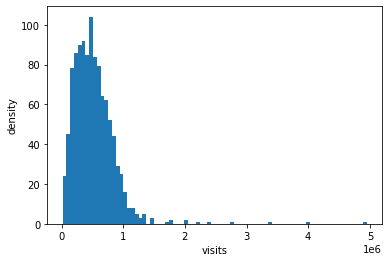

In [43]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(model_data['total_visits'], 80)
plt.xlabel("visits")
plt.ylabel("density")
plt.savefig('visits_distribution.png',dpi=250)
plt.show()

In [44]:
model_data['log_visits']=np.log(model_data['total_visits'])
model_data=model_data.sort_values(by=['log_visits'])
model_data=model_data.iloc[1: , :]
model_data

,fk_sgplaces,young,you_medium,low_income,medium_low_income,medium_high_income,high_income,old_medium,old,white,...,asian,rent_income_low,rent_income_med,rent_income_high,total_visits,polygon_area_sq_ft,public_transport,competition,medium_income,log_visits
575,22h-223@5pw-6cp-hyv,29.250000,34.816000,24.704000,25.244000,38.068000,11.980000,26.076000,7.966000,0.362447,...,0.036684,29.894000,17.050000,35.996000,23554,3291.553369,0,77468.163480,63.312000,10.067051
1032,zzw-225@5pw-69m-jy9,25.460000,19.780000,8.310000,13.990000,41.980000,35.700000,39.630000,14.170000,0.925596,...,0.029748,5.330000,2.550000,4.710000,23832,51725.673996,1,99673.561102,55.970000,10.078784
173,223-22w@5pw-69q-z4v,26.370000,21.720000,9.090000,15.440000,44.170000,31.290000,38.070000,12.820000,0.677152,...,0.044817,5.980000,2.930000,5.200000,25223,6959.277423,3,138190.952679,59.610000,10.135512
30,222-222@5pw-699-7qz,26.332000,31.710000,14.484000,20.898000,42.426000,22.188000,30.480000,10.094000,0.372515,...,0.011360,24.770000,11.990000,22.642000,25840,25882.616414,1,124511.916081,63.324000,10.159679
990,zzw-223@5pw-6rc-x5z,25.460000,19.780000,8.310000,13.990000,41.980000,35.700000,39.630000,14.170000,0.672692,...,0.203904,5.330000,2.550000,4.710000,30552,816.048507,1,63116.864514,55.970000,10.327185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,zzw-223@5pw-6fm-8sq,30.947436,31.734387,32.764235,25.382801,32.901992,8.950193,26.810489,8.658404,0.320905,...,0.003883,25.421286,15.163783,35.792990,2391434,21533.304289,2,340605.317393,58.284793,14.687404
1095,zzy-222@5sb-8dn-3bk,26.575616,27.693560,15.620957,19.029593,40.427530,24.920408,31.769511,12.303816,0.679151,...,0.056820,15.975371,8.356677,16.706076,2738924,166221.567042,5,42386.841911,59.457123,14.823076
795,zzw-222@5pw-5zk-7dv,19.316986,41.225800,19.357551,24.045892,41.696869,14.910631,26.346308,10.916570,0.802071,...,0.059070,30.192859,15.574042,27.603703,3403195,284078.274381,5,134807.480467,65.742761,15.040225
81,222-223@5pw-5zp-swk,19.707562,40.564321,18.490151,22.676981,41.280588,17.558698,26.907604,10.757056,0.784985,...,0.058309,29.736807,14.737346,26.671189,3968089,209951.902290,6,175714.051311,63.957569,15.193795


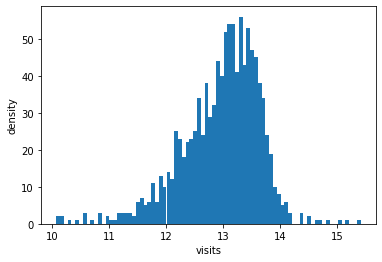

In [45]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(model_data['log_visits'], 80)
plt.xlabel("visits")
plt.ylabel("density")
plt.savefig('visits_distribution.png',dpi=250)
plt.show()

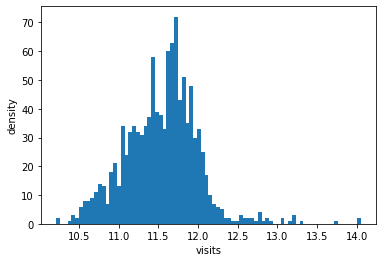

In [46]:
model_data['log_competition']=np.log(model_data['competition'])
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(model_data['log_competition'], 80)
plt.xlabel("visits")
plt.ylabel("density")
plt.savefig('visits_distribution.png',dpi=250)
plt.show()

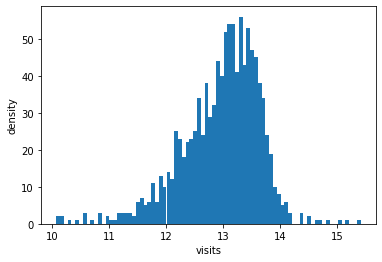

In [47]:
model_data['log_size']=np.log(model_data['polygon_area_sq_ft'])
count, bins, ignored = plt.hist(model_data['log_visits'], 80)
plt.xlabel("visits")
plt.ylabel("density")
plt.savefig('visits_distribution_log.png',dpi=250)
plt.show()

In [48]:
model_data

,fk_sgplaces,young,you_medium,low_income,medium_low_income,medium_high_income,high_income,old_medium,old,white,...,rent_income_med,rent_income_high,total_visits,polygon_area_sq_ft,public_transport,competition,medium_income,log_visits,log_competition,log_size
575,22h-223@5pw-6cp-hyv,29.250000,34.816000,24.704000,25.244000,38.068000,11.980000,26.076000,7.966000,0.362447,...,17.050000,35.996000,23554,3291.553369,0,77468.163480,63.312000,10.067051,11.257622,8.099115
1032,zzw-225@5pw-69m-jy9,25.460000,19.780000,8.310000,13.990000,41.980000,35.700000,39.630000,14.170000,0.925596,...,2.550000,4.710000,23832,51725.673996,1,99673.561102,55.970000,10.078784,11.509656,10.853710
173,223-22w@5pw-69q-z4v,26.370000,21.720000,9.090000,15.440000,44.170000,31.290000,38.070000,12.820000,0.677152,...,2.930000,5.200000,25223,6959.277423,3,138190.952679,59.610000,10.135512,11.836392,8.847831
30,222-222@5pw-699-7qz,26.332000,31.710000,14.484000,20.898000,42.426000,22.188000,30.480000,10.094000,0.372515,...,11.990000,22.642000,25840,25882.616414,1,124511.916081,63.324000,10.159679,11.732157,10.161327
990,zzw-223@5pw-6rc-x5z,25.460000,19.780000,8.310000,13.990000,41.980000,35.700000,39.630000,14.170000,0.672692,...,2.550000,4.710000,30552,816.048507,1,63116.864514,55.970000,10.327185,11.052743,6.704474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,zzw-223@5pw-6fm-8sq,30.947436,31.734387,32.764235,25.382801,32.901992,8.950193,26.810489,8.658404,0.320905,...,15.163783,35.792990,2391434,21533.304289,2,340605.317393,58.284793,14.687404,12.738480,9.977356
1095,zzy-222@5sb-8dn-3bk,26.575616,27.693560,15.620957,19.029593,40.427530,24.920408,31.769511,12.303816,0.679151,...,8.356677,16.706076,2738924,166221.567042,5,42386.841911,59.457123,14.823076,10.654593,12.021077
795,zzw-222@5pw-5zk-7dv,19.316986,41.225800,19.357551,24.045892,41.696869,14.910631,26.346308,10.916570,0.802071,...,15.574042,27.603703,3403195,284078.274381,5,134807.480467,65.742761,15.040225,11.811603,12.557005
81,222-223@5pw-5zp-swk,19.707562,40.564321,18.490151,22.676981,41.280588,17.558698,26.907604,10.757056,0.784985,...,14.737346,26.671189,3968089,209951.902290,6,175714.051311,63.957569,15.193795,12.076613,12.254634


In [74]:
model_data.to_csv('data/model_data_7.8')

# VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [60]:
model_data1=model_data.drop( columns=['fk_sgplaces','total_visits','competition'])
model_data1

,young,you_medium,low_income,medium_low_income,medium_high_income,high_income,old_medium,old,white,black_or_african_american,asian,rent_income_low,rent_income_med,rent_income_high,polygon_area_sq_ft,public_transport,log_visits,log_size,log_competition
575,29.250000,34.816000,24.704000,25.244000,38.068000,11.980000,26.076000,7.966000,0.362447,0.289372,0.036684,29.894000,17.050000,35.996000,3291.553369,0,10.067051,8.099115,11.257622
1032,25.460000,19.780000,8.310000,13.990000,41.980000,35.700000,39.630000,14.170000,0.925596,0.004539,0.029748,5.330000,2.550000,4.710000,51725.673996,1,10.078784,10.853710,11.509656
173,26.370000,21.720000,9.090000,15.440000,44.170000,31.290000,38.070000,12.820000,0.677152,0.224368,0.044817,5.980000,2.930000,5.200000,6959.277423,3,10.135512,8.847831,11.836392
30,26.332000,31.710000,14.484000,20.898000,42.426000,22.188000,30.480000,10.094000,0.372515,0.165562,0.011360,24.770000,11.990000,22.642000,25882.616414,1,10.159679,10.161327,11.732157
990,25.460000,19.780000,8.310000,13.990000,41.980000,35.700000,39.630000,14.170000,0.672692,0.036941,0.203904,5.330000,2.550000,4.710000,816.048507,1,10.327185,6.704474,11.052743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,30.947436,31.734387,32.764235,25.382801,32.901992,8.950193,26.810489,8.658404,0.320905,0.326439,0.003883,25.421286,15.163783,35.792990,21533.304289,2,14.687404,9.977356,12.738480
1095,26.575616,27.693560,15.620957,19.029593,40.427530,24.920408,31.769511,12.303816,0.679151,0.087177,0.056820,15.975371,8.356677,16.706076,166221.567042,5,14.823076,12.021077,10.654593
795,19.316986,41.225800,19.357551,24.045892,41.696869,14.910631,26.346308,10.916570,0.802071,0.076176,0.059070,30.192859,15.574042,27.603703,284078.274381,5,15.040225,12.557005,11.811603
81,19.707562,40.564321,18.490151,22.676981,41.280588,17.558698,26.907604,10.757056,0.784985,0.080510,0.058309,29.736807,14.737346,26.671189,209951.902290,6,15.193795,12.254634,12.076613


In [61]:
# using VIF on the bike_rental dataset
df_v = drop_column_using_vif_(model_data1.drop('log_visits', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_v.columns)

/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Dropping: high_income
Dropping: you_medium
Dropping: rent_income_med


/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Dropping: rent_income_high
Dropping: white
The columns remaining after VIF selection are:
Index(['young', 'low_income', 'medium_low_income', 'medium_high_income',
       'old_medium', 'old', 'black_or_african_american', 'asian',
       'rent_income_low', 'polygon_area_sq_ft', 'public_transport', 'log_size',
       'log_competition'],
      dtype='object')


/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [62]:
model_result = sm.OLS(endog=model_data[['log_visits']], exog=sm.add_constant(df_v)).fit()
model_result.summary()

/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_visits   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     13.21
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           1.80e-27
Time:                        17:45:26   Log-Likelihood:                -1064.7
No. Observations:                1101   AIC:                             2157.
Df Residuals:                    1087   BIC:                             2227.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         7.5643      0.730     10.357      0.000       6.131       8.997
young                        -0.0087      0.006     -1.470      0.142      -0.020       0.003
low_income                    0.0047      0.004      1.323      0.186      -0.002       0.012
medium_low_income             0.0030      0.005      0.614      0.540      -0.007       0.013
medium_high_income           -0.0044      0.004     -1.012      0.312      -0.013       0.004
old_medium                    0.0041      0.005      0.742      0.458      -0.007       0.015
old                          -0.0064      0.004     -1.597      0.111      -0.014       0.001
black_or_african_american    -0.0862      0.074     -1.159      0.247      -0.232       0.060
asian                        -0.0320      0.327     -0.098      0.922      -0.673       0.609
rent_income_low               0.0045      0.003      1.361      0.174      -0.002       0.011
polygon_area_sq_ft        -8.265e-07   3.84e-07     -2.153      0.032   -1.58e-06   -7.33e-08
public_transport             -0.0134      0.003     -5.333      0.000      -0.018      -0.008
log_size                      0.1080      0.017      6.226      0.000       0.074       0.142
log_competition               0.4015      0.049      8.149      0.000       0.305       0.498
==============================================================================
Omnibus:                      171.025   Durbin-Watson:                   0.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.803
Skew:                          -0.903   Prob(JB):                     2.45e-77
Kurtosis:                       5.104   Cond. No.                     2.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

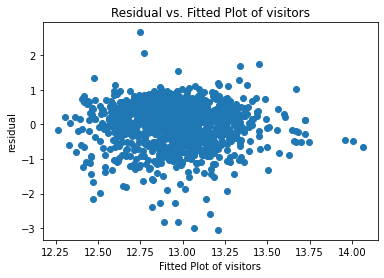

In [65]:
plt.scatter(model_result.fittedvalues,model_result.resid)
# adding title and labels
plt.xlabel('Fitted Plot of visitors')
plt.ylabel('residual')
plt.title('Residual vs. Fitted Plot of visitors')
plt.savefig('Residual_Plot_change.png',dpi=250)
plt.show()

In [68]:
from statsmodels.formula.api import ols
model = ols('log_visits~ log_competition', data=model_data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_visits   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     69.69
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           2.07e-16
Time:                        17:47:16   Log-Likelihood:                -1111.6
No. Observations:                1101   AIC:                             2227.
Df Residuals:                    1099   BIC:                             2237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.7815      0.501     

# Random Forest

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [50]:
model_data

,fk_sgplaces,young,you_medium,low_income,medium_low_income,medium_high_income,high_income,old_medium,old,white,...,rent_income_med,rent_income_high,total_visits,polygon_area_sq_ft,public_transport,competition,medium_income,log_visits,log_competition,log_size
575,22h-223@5pw-6cp-hyv,29.250000,34.816000,24.704000,25.244000,38.068000,11.980000,26.076000,7.966000,0.362447,...,17.050000,35.996000,23554,3291.553369,0,77468.163480,63.312000,10.067051,11.257622,8.099115
1032,zzw-225@5pw-69m-jy9,25.460000,19.780000,8.310000,13.990000,41.980000,35.700000,39.630000,14.170000,0.925596,...,2.550000,4.710000,23832,51725.673996,1,99673.561102,55.970000,10.078784,11.509656,10.853710
173,223-22w@5pw-69q-z4v,26.370000,21.720000,9.090000,15.440000,44.170000,31.290000,38.070000,12.820000,0.677152,...,2.930000,5.200000,25223,6959.277423,3,138190.952679,59.610000,10.135512,11.836392,8.847831
30,222-222@5pw-699-7qz,26.332000,31.710000,14.484000,20.898000,42.426000,22.188000,30.480000,10.094000,0.372515,...,11.990000,22.642000,25840,25882.616414,1,124511.916081,63.324000,10.159679,11.732157,10.161327
990,zzw-223@5pw-6rc-x5z,25.460000,19.780000,8.310000,13.990000,41.980000,35.700000,39.630000,14.170000,0.672692,...,2.550000,4.710000,30552,816.048507,1,63116.864514,55.970000,10.327185,11.052743,6.704474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,zzw-223@5pw-6fm-8sq,30.947436,31.734387,32.764235,25.382801,32.901992,8.950193,26.810489,8.658404,0.320905,...,15.163783,35.792990,2391434,21533.304289,2,340605.317393,58.284793,14.687404,12.738480,9.977356
1095,zzy-222@5sb-8dn-3bk,26.575616,27.693560,15.620957,19.029593,40.427530,24.920408,31.769511,12.303816,0.679151,...,8.356677,16.706076,2738924,166221.567042,5,42386.841911,59.457123,14.823076,10.654593,12.021077
795,zzw-222@5pw-5zk-7dv,19.316986,41.225800,19.357551,24.045892,41.696869,14.910631,26.346308,10.916570,0.802071,...,15.574042,27.603703,3403195,284078.274381,5,134807.480467,65.742761,15.040225,11.811603,12.557005
81,222-223@5pw-5zp-swk,19.707562,40.564321,18.490151,22.676981,41.280588,17.558698,26.907604,10.757056,0.784985,...,14.737346,26.671189,3968089,209951.902290,6,175714.051311,63.957569,15.193795,12.076613,12.254634


In [51]:
model_data.to_csv('model_data2.csv')

In [52]:
model_data_r=model_data[['young', 'you_medium', 'old_medium','old', 'low_income','medium_income','high_income' ,'white', 'black_or_african_american', 'asian','rent_income_low','rent_income_med','rent_income_high','log_size','public_transport','competition','total_visits']]
#model_data_r=model_data[['polygon_area_sq_ft','public_transport','competition']]

In [53]:
model_data_r

,young,you_medium,old_medium,old,low_income,medium_income,high_income,white,black_or_african_american,asian,rent_income_low,rent_income_med,rent_income_high,log_size,public_transport,competition,total_visits
575,29.250000,34.816000,26.076000,7.966000,24.704000,63.312000,11.980000,0.362447,0.289372,0.036684,29.894000,17.050000,35.996000,8.099115,0,77468.163480,23554
1032,25.460000,19.780000,39.630000,14.170000,8.310000,55.970000,35.700000,0.925596,0.004539,0.029748,5.330000,2.550000,4.710000,10.853710,1,99673.561102,23832
173,26.370000,21.720000,38.070000,12.820000,9.090000,59.610000,31.290000,0.677152,0.224368,0.044817,5.980000,2.930000,5.200000,8.847831,3,138190.952679,25223
30,26.332000,31.710000,30.480000,10.094000,14.484000,63.324000,22.188000,0.372515,0.165562,0.011360,24.770000,11.990000,22.642000,10.161327,1,124511.916081,25840
990,25.460000,19.780000,39.630000,14.170000,8.310000,55.970000,35.700000,0.672692,0.036941,0.203904,5.330000,2.550000,4.710000,6.704474,1,63116.864514,30552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,30.947436,31.734387,26.810489,8.658404,32.764235,58.284793,8.950193,0.320905,0.326439,0.003883,25.421286,15.163783,35.792990,9.977356,2,340605.317393,2391434
1095,26.575616,27.693560,31.769511,12.303816,15.620957,59.457123,24.920408,0.679151,0.087177,0.056820,15.975371,8.356677,16.706076,12.021077,5,42386.841911,2738924
795,19.316986,41.225800,26.346308,10.916570,19.357551,65.742761,14.910631,0.802071,0.076176,0.059070,30.192859,15.574042,27.603703,12.557005,5,134807.480467,3403195
81,19.707562,40.564321,26.907604,10.757056,18.490151,63.957569,17.558698,0.784985,0.080510,0.058309,29.736807,14.737346,26.671189,12.254634,6,175714.051311,3968089


In [351]:
model_data_r=model_data_r.iloc[1:]

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(model_data_r)
data1=scaler.transform(model_data_r)
a=pd.DataFrame(data1)

In [55]:
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.617633,0.570754,0.519392,0.086276,0.339920,0.762395,0.130026,0.372080,0.291856,0.074550,0.704703,0.677337,0.516664,0.344700,0.000000,0.040715,0.000000
1,0.525329,0.284463,0.817742,0.162568,0.079077,0.622814,0.468206,0.957963,0.000052,0.060194,0.066511,0.058472,0.043136,0.650169,0.018868,0.058718,0.000056
2,0.547491,0.321401,0.783403,0.145967,0.091488,0.692015,0.405332,0.699490,0.225261,0.091385,0.083398,0.074691,0.050552,0.427728,0.056604,0.089948,0.000339
3,0.546566,0.511615,0.616333,0.112445,0.177311,0.762624,0.275563,0.382555,0.165017,0.022136,0.571577,0.461374,0.314545,0.573388,0.018868,0.078857,0.000464
4,0.525329,0.284463,0.817742,0.162568,0.079077,0.622814,0.468206,0.694850,0.033247,0.420654,0.066511,0.058472,0.043136,0.190042,0.018868,0.029079,0.001420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.658973,0.512079,0.535560,0.094791,0.468166,0.666821,0.086829,0.328861,0.329830,0.006661,0.588498,0.596832,0.513591,0.552986,0.037736,0.254063,0.480469
1097,0.552499,0.435140,0.644717,0.139619,0.195401,0.689109,0.314520,0.701569,0.084713,0.116228,0.343086,0.306303,0.224702,0.779623,0.094340,0.012271,0.550978
1098,0.375718,0.692799,0.525342,0.122560,0.254854,0.808608,0.171808,0.829451,0.073443,0.120885,0.712467,0.614342,0.389643,0.839055,0.094340,0.087205,0.685766
1099,0.385230,0.680204,0.537698,0.120598,0.241053,0.774669,0.209562,0.811676,0.077883,0.119309,0.700619,0.578632,0.375529,0.805524,0.113208,0.120371,0.800389


In [57]:
a['young'] = a[0]
a['you_medium']= a[1]
a['old_medium'] = a[2]
a['old'] = a[3]
a['low_income'] = a[4]
a['medium_income'] = a[5]
a['high_income'] = a[6]
a['white'] = a[7]
a['black_or_african_american'] = a[8]
a['asian'] = a[9]
a['rent_income_low']=a[10]
a['rent_income_med']=a[11]
a['rent_income_high']=a[12]
a['size'] = a[13]
a['public_transport'] = a[14]
a['competition'] = a[15]
a['total_visits'] = a[16]
#b=a[['size','young', 'you_medium', 'old_medium', 'old','low_income','medium_low_income','medium_high_income','high_income', 'white', 'black_or_african_american', 'asian','rent_income_low','rent_income_med','rent_income_high','public_transport','competition']]
b=a[['young', 'you_medium', 'old_medium', 'old','low_income','medium_income','high_income', 'white', 'black_or_african_american', 'asian','rent_income_low','rent_income_med','rent_income_high']]
#b=a[['size','public_transport','competition']]
#b=a[['young', 'you_medium', 'old_medium', 'old']]
#b=a[['low_income','medium_low_income','medium_high_income','high_income']]

In [60]:
a.to_csv('data/a.csv')

In [61]:
a

,0,1,2,3,4,5,6,7,8,9,...,white,black_or_african_american,asian,rent_income_low,rent_income_med,rent_income_high,size,public_transport,competition,total_visits
0,0.617633,0.570754,0.519392,0.086276,0.339920,0.762395,0.130026,0.372080,0.291856,0.074550,...,0.372080,0.291856,0.074550,0.704703,0.677337,0.516664,0.344700,0.000000,0.040715,0.000000
1,0.525329,0.284463,0.817742,0.162568,0.079077,0.622814,0.468206,0.957963,0.000052,0.060194,...,0.957963,0.000052,0.060194,0.066511,0.058472,0.043136,0.650169,0.018868,0.058718,0.000056
2,0.547491,0.321401,0.783403,0.145967,0.091488,0.692015,0.405332,0.699490,0.225261,0.091385,...,0.699490,0.225261,0.091385,0.083398,0.074691,0.050552,0.427728,0.056604,0.089948,0.000339
3,0.546566,0.511615,0.616333,0.112445,0.177311,0.762624,0.275563,0.382555,0.165017,0.022136,...,0.382555,0.165017,0.022136,0.571577,0.461374,0.314545,0.573388,0.018868,0.078857,0.000464
4,0.525329,0.284463,0.817742,0.162568,0.079077,0.622814,0.468206,0.694850,0.033247,0.420654,...,0.694850,0.033247,0.420654,0.066511,0.058472,0.043136,0.190042,0.018868,0.029079,0.001420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.658973,0.512079,0.535560,0.094791,0.468166,0.666821,0.086829,0.328861,0.329830,0.006661,...,0.328861,0.329830,0.006661,0.588498,0.596832,0.513591,0.552986,0.037736,0.254063,0.480469
1097,0.552499,0.435140,0.644717,0.139619,0.195401,0.689109,0.314520,0.701569,0.084713,0.116228,...,0.701569,0.084713,0.116228,0.343086,0.306303,0.224702,0.779623,0.094340,0.012271,0.550978
1098,0.375718,0.692799,0.525342,0.122560,0.254854,0.808608,0.171808,0.829451,0.073443,0.120885,...,0.829451,0.073443,0.120885,0.712467,0.614342,0.389643,0.839055,0.094340,0.087205,0.685766
1099,0.385230,0.680204,0.537698,0.120598,0.241053,0.774669,0.209562,0.811676,0.077883,0.119309,...,0.811676,0.077883,0.119309,0.700619,0.578632,0.375529,0.805524,0.113208,0.120371,0.800389


In [383]:
b['visit']=model_data['log_visits']

/var/folders/np/8s6_n_b16lx7rwgjy309j74m0000gn/T/ipykernel_8228/2925910467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['visit']=model_data['log_visits']


In [384]:
b=b.dropna()

In [385]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(b.drop(['visit'], axis = 1), b.visit,test_size = 0.25, random_state=random_state_split)

In [386]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(824, 14)
(824,)
(275, 14)
(275,)
True
True


In [387]:
from sklearn.ensemble import RandomForestRegressor
reg_random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 1000, max_depth=2)
reg_random_forest.fit(train_x, train_y)

RandomForestRegressor(max_depth=2, n_estimators=1000, random_state=1000)

In [388]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [389]:
from sklearn.metrics import mean_squared_error,r2_score
print("R2 on the training data:")
print(reg_random_forest.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(reg_random_forest.score(X=test_x, y=test_y))

R2 on the training data:
0.059709502181406804
R2 on the testing data:
-0.012577462245761728


In [390]:
print("RMSE on the training data:")
print(mean_squared_error(train_y, reg_random_forest.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, reg_random_forest.predict(test_x), squared=False))

RMSE on the training data:
0.6697151922927904
RMSE on the testing data:
0.6726180907067735


In [391]:
import rfpimp

                           Importance
Feature                              
high_income                  0.024814
medium_high_income           0.009781
young                        0.003557
low_income                   0.001071
asian                        0.001015
black_or_african_american    0.000816
medium_low_income            0.000795
rent_income_med              0.000165
white                       -0.000678
old_medium                  -0.000759
you_medium                  -0.002638
old                         -0.004237
rent_income_high            -0.004569
rent_income_low             -0.005353


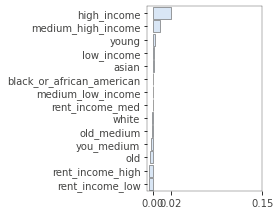

In [392]:
imp = rfpimp.importances(reg_random_forest, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

In [393]:
bootstrap = [True, False]
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000, num = 10)]
max_depth = [int(x) for x in np.linspace(start=10, stop = 110, num = 11)]
max_depth.append(None)
max_features = ['auto','sqrt']
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
random_grid = {
    'bootstrap' : bootstrap,
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'max_features' : max_features,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}
print(random_grid)

{'bootstrap': [True, False], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [394]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = reg_random_forest, param_distributions = random_grid,
                               cv = 3, n_jobs = -1, random_state = 42, n_iter = 3, scoring='neg_mean_absolute_error',
                               verbose = 2, return_train_score = True)
rf_random.fit(train_x, train_y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=2,
                                                   n_estimators=1000,
                                                   random_state=1000),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},


In [395]:
def evaluate(model, X_test, y_test) :
    prediction = model.predict(X_test)
    error = abs(prediction - y_test)
    mape = 100 * np.mean(error/y_test)
    accuracy = 100 - mape
    score1=model.score(X=X_test, y=y_test)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(error)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('r2 = {:0.2f}%.'.format(score1))
    
    return accuracy

evaluate(reg_random_forest, test_x, test_y)

Model Performance
Average Error: 0.5122 degrees.
Accuracy = 95.95%.
r2 = -0.01%.


95.94801520336145

# Regression: Classifying by Size

In [212]:
model_data

,fk_sgplaces,young,you_medium,low_income,medium_low_income,medium_high_income,high_income,old_medium,old,white,black_or_african_american,asian,total_visits,polygon_area_sq_ft,public_transport,competition,log_visits,log_size
575,22h-223@5pw-6cp-hyv,29.250000,34.816000,24.704000,25.244000,38.068000,11.980000,26.076000,7.966000,0.362447,0.289372,0.036684,23554,3291.553369,0,0.036585,10.067051,8.099115
1032,zzw-225@5pw-69m-jy9,25.460000,19.780000,8.310000,13.990000,41.980000,35.700000,39.630000,14.170000,0.925596,0.004539,0.029748,23832,51725.673996,1,0.100000,10.078784,10.853710
173,223-22w@5pw-69q-z4v,26.370000,21.720000,9.090000,15.440000,44.170000,31.290000,38.070000,12.820000,0.677152,0.224368,0.044817,25223,6959.277423,3,0.024648,10.135512,8.847831
30,222-222@5pw-699-7qz,26.332000,31.710000,14.484000,20.898000,42.426000,22.188000,30.480000,10.094000,0.372515,0.165562,0.011360,25840,25882.616414,1,0.023364,10.159679,10.161327
990,zzw-223@5pw-6rc-x5z,25.460000,19.780000,8.310000,13.990000,41.980000,35.700000,39.630000,14.170000,0.672692,0.036941,0.203904,30552,816.048507,1,0.048077,10.327185,6.704474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,zzw-223@5pw-6fm-8sq,30.947436,31.734387,32.764235,25.382801,32.901992,8.950193,26.810489,8.658404,0.320905,0.326439,0.003883,2391434,21533.304289,2,0.118343,14.687404,9.977356
1095,zzy-222@5sb-8dn-3bk,26.575616,27.693560,15.620957,19.029593,40.427530,24.920408,31.769511,12.303816,0.679151,0.087177,0.056820,2738924,166221.567042,5,0.022472,14.823076,12.021077
795,zzw-222@5pw-5zk-7dv,19.316986,41.225800,19.357551,24.045892,41.696869,14.910631,26.346308,10.916570,0.802071,0.076176,0.059070,3403195,284078.274381,5,0.064356,15.040225,12.557005
81,222-223@5pw-5zp-swk,19.707562,40.564321,18.490151,22.676981,41.280588,17.558698,26.907604,10.757056,0.784985,0.080510,0.058309,3968089,209951.902290,6,0.040816,15.193795,12.254634


In [503]:
model_size=model_data.sort_values(by='polygon_area_sq_ft', ascending=False)
model_size_h=model_size[600:]

In [504]:
model_size_h

,fk_sgplaces,young,you_medium,low_income,medium_low_income,medium_high_income,high_income,old_medium,old,white,...,asian,rent_income_low,rent_income_med,rent_income_high,total_visits,polygon_area_sq_ft,public_transport,competition,log_visits,log_size
588,22j-222@5pw-6cm-xkf,26.790000,24.780000,11.790000,18.990000,43.600000,25.620000,35.250000,12.090000,0.004805,...,0.000692,9.440000,4.340000,8.280000,326654,4094.629718,0,0.148148,12.696657,8.317432
868,zzw-222@5pw-6c3-py9,28.870000,28.920000,18.960000,25.200000,43.830000,12.000000,30.360000,10.400000,0.334603,...,0.007422,21.620000,11.510000,22.570000,34249,4086.967787,0,0.114286,10.441413,8.315559
525,22f-222@5pw-6qm-6tv,20.476011,30.452771,16.561233,21.658384,42.560626,19.224373,31.891436,15.969667,0.555228,...,0.114219,20.865295,10.856368,20.071372,732509,4086.226450,2,0.084158,13.504231,8.315377
942,zzw-223@5pw-5zw-73q,26.480000,24.940000,5.800000,9.790000,36.860000,47.550000,36.980000,10.790000,0.867887,...,0.052614,7.020000,3.480000,5.760000,194920,4025.682295,11,0.024051,12.180344,8.300450
593,22j-222@5pw-6q5-k4v,24.640000,33.570000,11.500000,18.030000,41.490000,28.980000,30.560000,9.890000,0.544396,...,0.162367,26.870000,12.310000,22.690000,404832,4024.705414,1,0.051020,12.911227,8.300207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,22h-222@5pw-6cd-j5f,28.751458,29.096667,24.935417,23.558958,36.889167,14.616875,29.926250,10.614167,0.004805,...,0.000692,21.598750,12.790000,28.181250,421994,436.249845,0,0.072727,12.952746,6.078215
808,zzw-222@5pw-623-xqz,28.395675,39.034998,14.680036,20.309326,43.126609,21.881445,23.981608,6.256882,0.588163,...,0.156260,32.455277,15.191882,24.724137,132162,385.969051,43,0.014719,11.791784,5.955757
254,225-223@5pw-624-j5f,22.792235,32.377115,15.020784,18.578327,37.080591,29.314418,31.225309,12.464380,0.338804,...,0.029571,24.899933,11.151515,20.872346,844675,265.914702,14,0.014026,13.646707,5.583176
770,23c-222@5pw-6qq-33q,27.183510,37.060669,19.854411,24.278192,41.469684,14.393041,26.348118,7.566310,0.508696,...,0.223355,32.659524,17.608940,33.749334,585783,178.237664,0,0.111111,13.280705,5.183118


In [505]:
model_size_h=model_size_h.drop( columns=['fk_sgplaces','total_visits','polygon_area_sq_ft'])
model_size_h

,young,you_medium,low_income,medium_low_income,medium_high_income,high_income,old_medium,old,white,black_or_african_american,asian,rent_income_low,rent_income_med,rent_income_high,public_transport,competition,log_visits,log_size
588,26.790000,24.780000,11.790000,18.990000,43.600000,25.620000,35.250000,12.090000,0.004805,0.980600,0.000692,9.440000,4.340000,8.280000,0,0.148148,12.696657,8.317432
868,28.870000,28.920000,18.960000,25.200000,43.830000,12.000000,30.360000,10.400000,0.334603,0.458385,0.007422,21.620000,11.510000,22.570000,0,0.114286,10.441413,8.315559
525,20.476011,30.452771,16.561233,21.658384,42.560626,19.224373,31.891436,15.969667,0.555228,0.201387,0.114219,20.865295,10.856368,20.071372,2,0.084158,13.504231,8.315377
942,26.480000,24.940000,5.800000,9.790000,36.860000,47.550000,36.980000,10.790000,0.867887,0.039449,0.052614,7.020000,3.480000,5.760000,11,0.024051,12.180344,8.300450
593,24.640000,33.570000,11.500000,18.030000,41.490000,28.980000,30.560000,9.890000,0.544396,0.149291,0.162367,26.870000,12.310000,22.690000,1,0.051020,12.911227,8.300207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,28.751458,29.096667,24.935417,23.558958,36.889167,14.616875,29.926250,10.614167,0.004805,0.980600,0.000692,21.598750,12.790000,28.181250,0,0.072727,12.952746,6.078215
808,28.395675,39.034998,14.680036,20.309326,43.126609,21.881445,23.981608,6.256882,0.588163,0.122667,0.156260,32.455277,15.191882,24.724137,43,0.014719,11.791784,5.955757
254,22.792235,32.377115,15.020784,18.578327,37.080591,29.314418,31.225309,12.464380,0.338804,0.461694,0.029571,24.899933,11.151515,20.872346,14,0.014026,13.646707,5.583176
770,27.183510,37.060669,19.854411,24.278192,41.469684,14.393041,26.348118,7.566310,0.508696,0.119851,0.223355,32.659524,17.608940,33.749334,0,0.111111,13.280705,5.183118


In [506]:
# using VIF on the bike_rental dataset
df_v = drop_column_using_vif_(model_size_h.drop('log_visits', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_v.columns)

/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/willowliu/opt

Dropping: high_income
Dropping: old
Dropping: rent_income_med
Dropping: rent_income_high
Dropping: white
The columns remaining after VIF selection are:
Index(['young', 'you_medium', 'low_income', 'medium_low_income',
       'medium_high_income', 'old_medium', 'black_or_african_american',
       'asian', 'rent_income_low', 'public_transport', 'competition',
       'log_size'],
      dtype='object')


/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [507]:
model_result = sm.OLS(endog=model_size_h[['log_visits']], exog=sm.add_constant(df_v)).fit()
model_result.summary()

/Users/willowliu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_visits   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.347
Date:                Thu, 16 Jun 2022   Prob (F-statistic):              0.189
Time:                        18:35:52   Log-Likelihood:                -512.98
No. Observations:                 501   AIC:                             1052.
Df Residuals:                     488   BIC:                             1107.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        13.0798      0.794     16.476      0.000      11.520      14.640
young                         0.0026      0.005      0.480      0.631      -0.008       0.013
you_medium                    0.0056      0.007      0.793      0.428      -0.008       0.020
low_income                    0.0021      0.005      0.388      0.698      -0.008       0.013
medium_low_income             0.0042      0.008      0.547      0.585      -0.011       0.019
medium_high_income           -0.0077      0.007     -1.149      0.251      -0.021       0.005
old_medium                   -0.0026      0.010     -0.270      0.787      -0.022       0.016
black_or_african_american    -0.1136      0.121     -0.937      0.349      -0.352       0.125
asian                         0.4701      0.505      0.931      0.352      -0.522       1.463
rent_income_low              -0.0010      0.005     -0.182      0.855      -0.012       0.010
public_transport             -0.0073      0.004     -1.749      0.081      -0.015       0.001
competition                   0.0147      0.651      0.023      0.982      -1.264       1.294
log_size                     -0.0304      0.066     -0.462      0.644      -0.160       0.099
==============================================================================
Omnibus:                       74.005   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.215
Skew:                          -0.982   Prob(JB):                     1.92e-24
Kurtosis:                       4.173   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

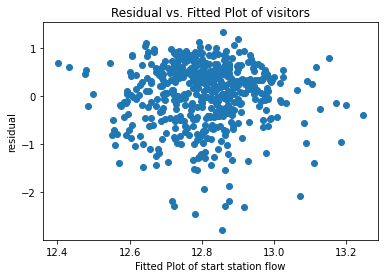

In [508]:
plt.scatter(model_result.fittedvalues,model_result.resid)
# adding title and labels
plt.xlabel('Fitted Plot of start station flow')
plt.ylabel('residual')
plt.title('Residual vs. Fitted Plot of visitors')
plt.savefig('Residual_Plot_change.png',dpi=250)
plt.show()

In [509]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(model_size_h)
data1=scaler.transform(model_size_h)
a=pd.DataFrame(data1)

In [510]:
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.557720,0.379665,0.134447,0.350666,0.689291,0.324494,0.721330,0.136990,0.000000,1.000000,0.000066,0.173292,0.134870,0.097170,0.000000,0.396633,0.638567,1.000000
1,0.608378,0.458492,0.248528,0.509734,0.694565,0.130311,0.613691,0.116208,0.354190,0.464408,0.016178,0.489738,0.440888,0.313455,0.000000,0.301818,0.090909,0.999437
2,0.403946,0.487677,0.210362,0.419016,0.665458,0.233310,0.647401,0.184698,0.591132,0.200827,0.271871,0.470130,0.412991,0.275638,0.044444,0.217462,0.834677,0.999382
3,0.550170,0.382711,0.039141,0.115010,0.534740,0.637154,0.759410,0.121003,0.926915,0.034741,0.124377,0.110418,0.098165,0.059028,0.244444,0.049160,0.513187,0.994895
4,0.505358,0.547030,0.129833,0.326076,0.640908,0.372398,0.618094,0.109936,0.579500,0.147396,0.387145,0.626137,0.475032,0.315272,0.022222,0.124675,0.690673,0.994822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.605491,0.461856,0.343602,0.467699,0.535409,0.167620,0.604144,0.118841,0.000000,1.000000,0.000066,0.489186,0.495519,0.398384,0.000000,0.185455,0.700755,0.326891
497,0.596826,0.651085,0.180430,0.384460,0.678436,0.271193,0.473291,0.065259,0.626503,0.120091,0.372525,0.771246,0.598032,0.346059,0.955556,0.023030,0.418830,0.290080
498,0.460356,0.524317,0.185852,0.340121,0.539798,0.377166,0.632738,0.141593,0.358702,0.467802,0.069207,0.574953,0.425587,0.287761,0.311111,0.021092,0.869275,0.178082
499,0.567304,0.613493,0.262759,0.486122,0.640442,0.164429,0.525382,0.081361,0.541159,0.117202,0.533162,0.776553,0.701192,0.482660,0.000000,0.292929,0.780396,0.057824


In [511]:
a['young'] = a[0]
a['you_medium']= a[1]
a['old_medium'] = a[2]
a['old'] = a[3]
a['low_income'] = a[4]
a['medium_low_income']= a[5]
a['medium_high_income'] = a[6]
a['high_income'] = a[7]
a['white'] = a[8]
a['black_or_african_american'] = a[9]
a['asian'] = a[10]
a['size'] = a[11]
a['public_transport'] = a[12]
a['competition'] = a[13]
b=a[['size','young', 'you_medium', 'old_medium', 'old','low_income','medium_low_income','medium_high_income','high_income', 'white', 'black_or_african_american', 'asian','public_transport','competition']]
#b=a[['size','public_transport','competition']]
#b=a[['young', 'you_medium', 'old_medium', 'old']]
#b=a[['low_income','medium_low_income','medium_high_income','high_income']]

In [512]:
b['visit']=model_data['log_visits']
b=b.dropna()

/var/folders/np/8s6_n_b16lx7rwgjy309j74m0000gn/T/ipykernel_8228/4145385460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['visit']=model_data['log_visits']


In [513]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(b.drop(['visit'], axis = 1), b.visit, random_state=random_state_split)

In [514]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(375, 14)
(375,)
(125, 14)
(125,)
True
True


In [515]:
from sklearn.ensemble import RandomForestRegressor
reg_random_forest = RandomForestRegressor(n_estimators =500, random_state = 100, max_depth=2)
reg_random_forest.fit(train_x, train_y)

RandomForestRegressor(max_depth=2, n_estimators=500, random_state=100)

In [516]:
print("R2 on the training data:")
print(reg_random_forest.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(reg_random_forest.score(X=test_x, y=test_y))

R2 on the training data:
0.11090968182101668
R2 on the testing data:
-0.05513801301369914


In [518]:
bootstrap = [True, False]
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000, num = 10)]
max_depth = [int(x) for x in np.linspace(start=10, stop = 110, num = 11)]
max_depth.append(None)
max_features = ['auto','sqrt']
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
random_grid = {
    'bootstrap' : bootstrap,
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'max_features' : max_features,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}
print(random_grid)

{'bootstrap': [True, False], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [519]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = reg_random_forest, param_distributions = random_grid,
                               cv = 3, n_jobs = -1, random_state = 42, n_iter = 3, scoring='neg_mean_absolute_error',
                               verbose = 2, return_train_score = True)
rf_random.fit(train_x, train_y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=2,
                                                   n_estimators=500,
                                                   random_state=100),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
  

In [520]:
def evaluate(model, X_test, y_test) :
    prediction = model.predict(X_test)
    error = abs(prediction - y_test)
    mape = 100 * np.mean(error/y_test)
    accuracy = 100 - mape
    score1=model.score(X=X_test, y=y_test)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(error)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('r2 = {:0.2f}%.'.format(score1))
    
    return accuracy

evaluate(reg_random_forest, test_x, test_y)

Model Performance
Average Error: 0.5103 degrees.
Accuracy = 96.02%.
r2 = -0.06%.


96.02331282682984

                           Importance
Feature                              
public_transport             0.002307
low_income                   0.001010
old_medium                   0.000915
competition                  0.000244
you_medium                  -0.000014
medium_high_income          -0.000196
high_income                 -0.001470
size                        -0.001726
asian                       -0.003002
white                       -0.003112
black_or_african_american   -0.003879
old                         -0.005982
medium_low_income           -0.009273
young                       -0.034700


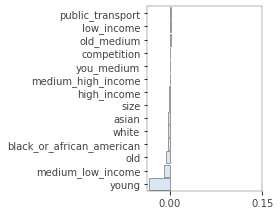

In [521]:
imp = rfpimp.importances(reg_random_forest, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()